<a href="https://colab.research.google.com/github/shemi024/data-preprocessing/blob/main/Copy_of_regg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_excel('/content/drive/MyDrive/tip-amount_(1).xlsx')

In [ ]:
data.head()

,Meal,Observed total bill(xi),Observed tip bill(yi)
0,1,34,5
1,2,108,17
2,3,64,11
3,4,88,8
4,5,99,14


In [ ]:
#find the correlation using corr function
corrmatrix = data.corr()

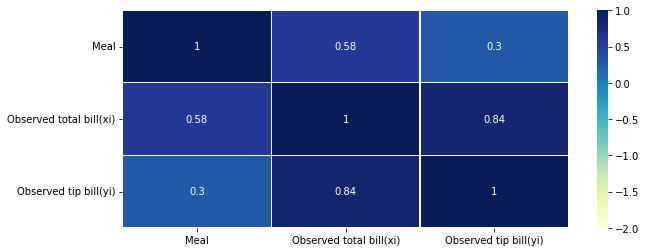

In [ ]:
#find the correlation using corr function
corrmatrix = data.corr()
plt.subplots(figsize =(10,4))
#using the heatmap function,we plot the correlation matrix
#vmin and vmax represents the minimum and maximum correlation values
# annot is used to give annotations inside each corelation to specify the value inside each correlation cell
# cmap represents the color of the plot
sns.heatmap(corrmatrix, vmin=-2, vmax=1, annot = True, linewidths=0.2, cmap='YlGnBu')

In [ ]:
#remove the column which have high positive correlation and high negative correlation
#meal column have extremely low correlation, so we want to remove it.
#for doing that, we want to split our dataset into dependent and  independent variable


In [ ]:
data.columns

Index(['Meal', 'Observed total bill(xi)', 'Observed tip bill(yi)'], dtype='object')

In [ ]:
y=data['Observed tip bill(yi)']
x=data.drop(['Meal','Observed tip bill(yi)'], axis=1)


In [ ]:
#split into training and testing
# training and testing the set is available in the sklearn library
#sklearn-ppt
from sklearn.model_selection import train_test_split
#random state is a counter, in which decides in which pattern the data shuld be selected and testing set
#test_size is 0.25. that is 25% data for testing and 75% data for training
x_train,x_test,y_tarin,y_test=train_test_split(x,y,random_state=42,test_size=0.25)


In [ ]:
#make linear regretion model
from sklearn import  linear_model
#create instance of the model
lr=linear_model.LinearRegression()
#now fitting the instance created to the tarining data and creating the linear regression model and store into another variable
model = lr.fit(x_train,y_tarin)

In [ ]:
#predict the output
predictions = model.predict(x_test)

In [ ]:
#original value in y_test
print(y_test)

1    17
4    14
Name: Observed tip bill(yi), dtype: int64


In [ ]:
print(predictions)

[10.82786885 10.27459016]


In [ ]:
#by comparing these value the mean squared error is found.for that we import mean square error from sklearn

In [ ]:
from sklearn.metrics import mean_squared_error
print('MSC is:',mean_squared_error(y_test,predictions))

MSC is: 25.98694067454983


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/winequality-red_(1).csv')

In [ ]:
#preprocessing steps
data.shape

(1599, 12)

In [ ]:
#info function used to check the basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
#check if any null value in the dataset
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
#check how many diffrent values are there in the quality column
#quality column is the dependant variable 
data['quality'].unique()


array([5, 6, 7, 4, 8, 3])

In [ ]:
#describe function check the statistics of the dataset
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


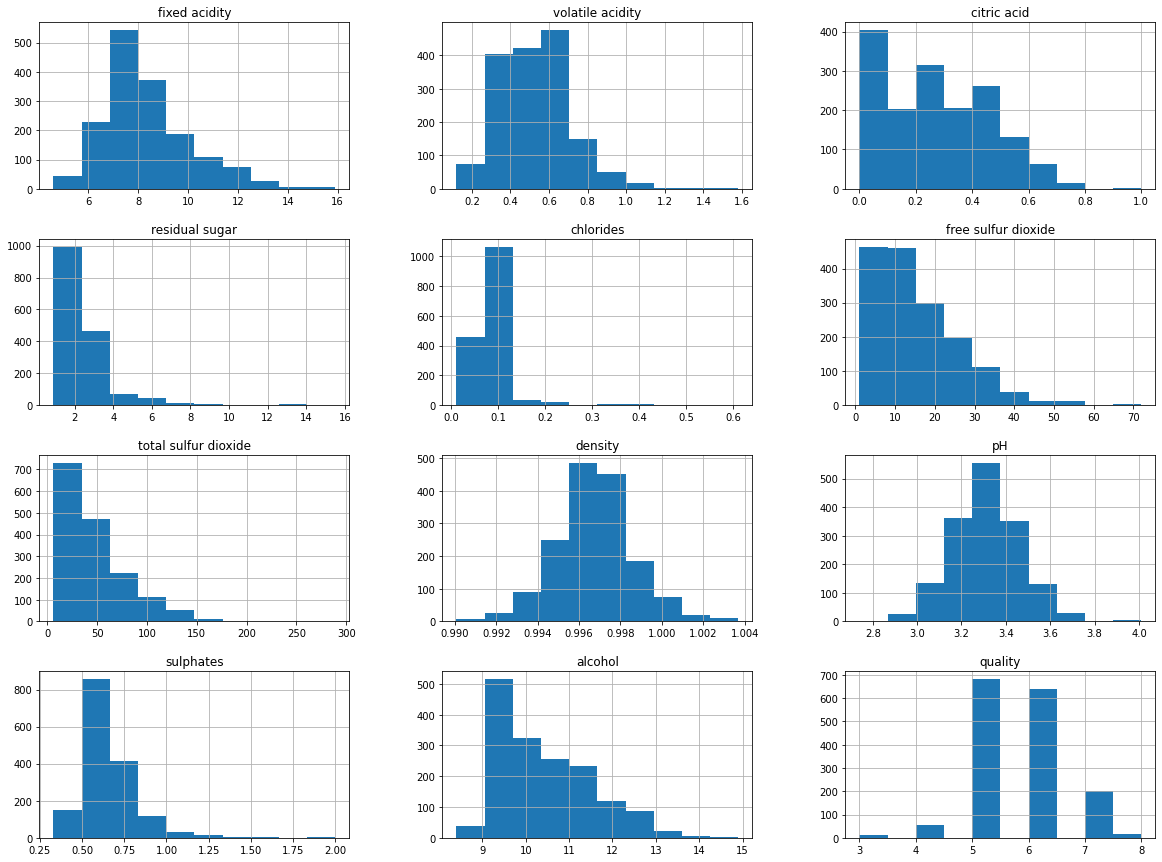

In [ ]:
#plot histogram of all colums
#select variable to plot
freqgraph = data.select_dtypes(include=['int32','int64','float'])
#ploting histogram
freqgraph.hist(figsize=(20,15))
plt.show()

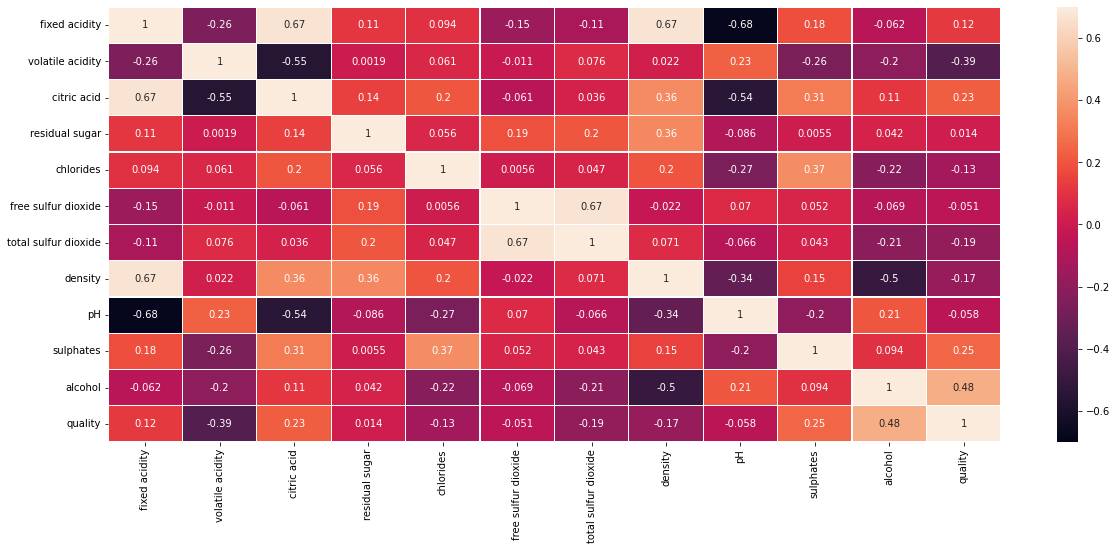

In [ ]:
#find correlation of each variable
corrmatrix =data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=-.7,vmax=0.7,annot=True,linewidths=0.2)


In [ ]:
#thecolumn fixed acidity and dencity has high correlation with citric acid
#free sulfur dioxide and total sulfur dioxide id highly correlated to each other
#so we want to remove the column
#remove fixed to remove the column
#remove fixed acidity,density and free sulfur dioxide

In [ ]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
data1=data.drop(['fixed acidity','density','free sulfur dioxide'],axis=1)
data1.columns

Index(['volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
       'total sulfur dioxide', 'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
y=data1['quality']
x=data1.drop(['quality'],axis=1)

In [ ]:
x.shape

(1599, 8)

In [ ]:
from sklearn.model_selection import  train_test_split
x_train,x_test,y_tarin,y_test=train_test_split(x,y,random_state=42,test_size=0.25)


In [ ]:
from sklearn import linear_model
lr= linear_model.LinearRegression()


In [ ]:
model= lr.fit(x_train,y_tarin)

In [ ]:
predictions =model.predict(x_test)

In [ ]:
print(y_test)

803     6
124     5
350     6
682     5
1326    6
       ..
1565    6
327     5
254     6
322     5
1160    7
Name: quality, Length: 400, dtype: int64


In [ ]:
print(predictions)

[5.36573498 5.07721369 5.60698274 5.39140074 5.72969707 5.21333352
 5.09687179 5.13821023 5.75687072 5.69698188 6.1597745  5.26198819
 5.54418606 5.20924318 5.41559645 6.49914113 5.20021116 5.59170724
 6.59225973 5.31259464 5.45007367 5.18916904 5.98702503 6.42238211
 5.36569034 5.43228543 6.39936141 5.39404074 5.16299376 6.17266341
 5.28343432 5.59746345 5.78576466 5.38225279 5.45861267 5.06846554
 6.18787978 5.72387681 5.62119428 6.2126     5.49319541 5.29621209
 6.19518032 5.2264394  5.85454011 5.82197098 6.42923069 5.57184348
 5.16874304 5.586664   5.15379748 5.10317495 5.61548557 6.45194053
 5.02201755 5.06598232 6.01545709 5.49104996 5.84592793 5.26518367
 5.63978429 5.98036776 5.27944843 5.34903789 6.43413819 5.37562983
 6.3607748  5.31080635 6.49376965 5.29196656 6.45490511 4.76722094
 5.80564046 5.84684295 6.1955758  5.30011142 6.80702574 5.86425989
 6.15637682 6.48774906 5.35459331 6.46061466 5.36391195 5.73485395
 5.68839601 6.32331397 5.30570103 5.85001562 6.32379254 5.2510

In [ ]:
from sklearn.metrics import mean_squared_error
print('MSE is:',mean_squared_error(y_test,predictions))

MSE is: 0.3891025192103126


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/heart (1).csv')

In [ ]:
#preprocessing steps
data.shape

(303, 14)

In [ ]:
#info function used to check the basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
#check if any null value in the dataset
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
#check how many diffrent values are there in the quality column
#quality column is the dependant variable 
data['age'].unique()


array([63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 58, 50, 66, 43, 69, 59,
       42, 61, 40, 71, 51, 65, 53, 46, 45, 39, 47, 62, 34, 35, 29, 55, 60,
       67, 68, 74, 76, 70, 38, 77])

In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


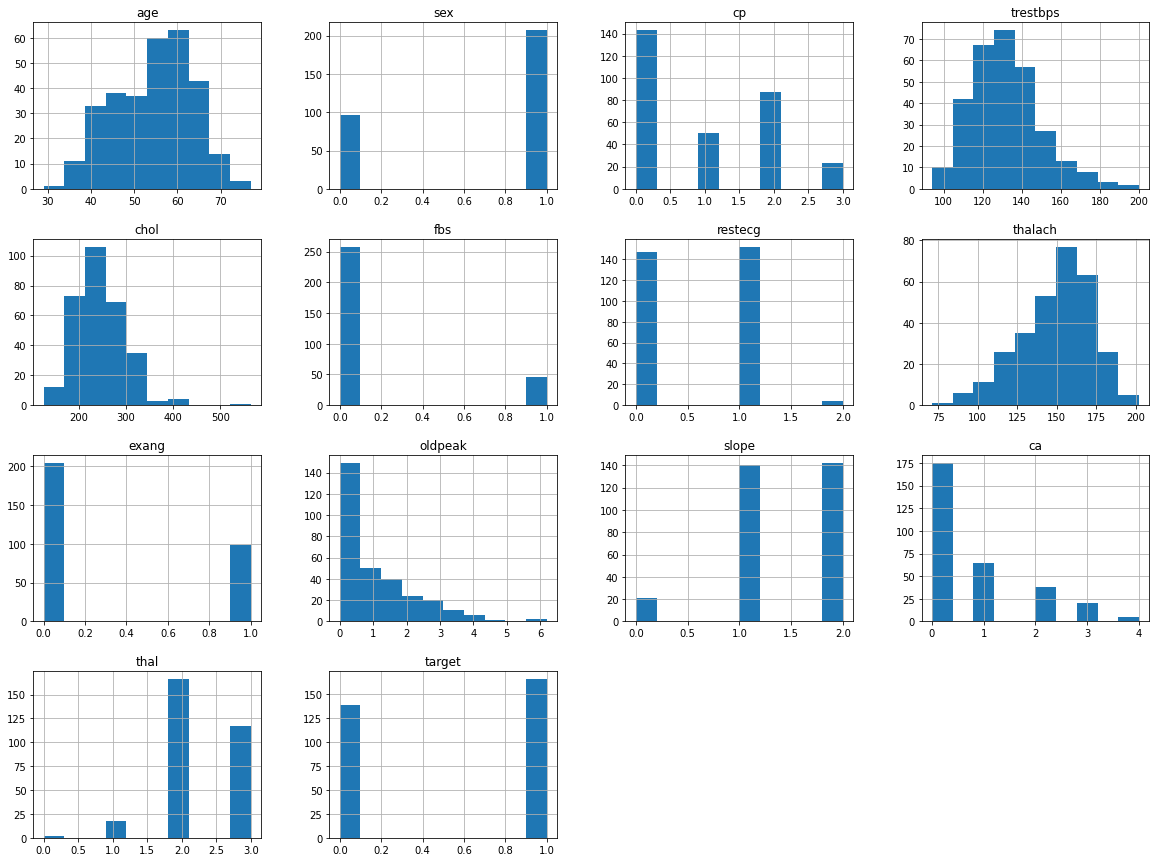

In [ ]:
#plot histogram of all colums
#select variable to plot
freqgraph = data.select_dtypes(include=['int32','int64','float'])
#ploting histogram
freqgraph.hist(figsize=(20,15))
plt.show()

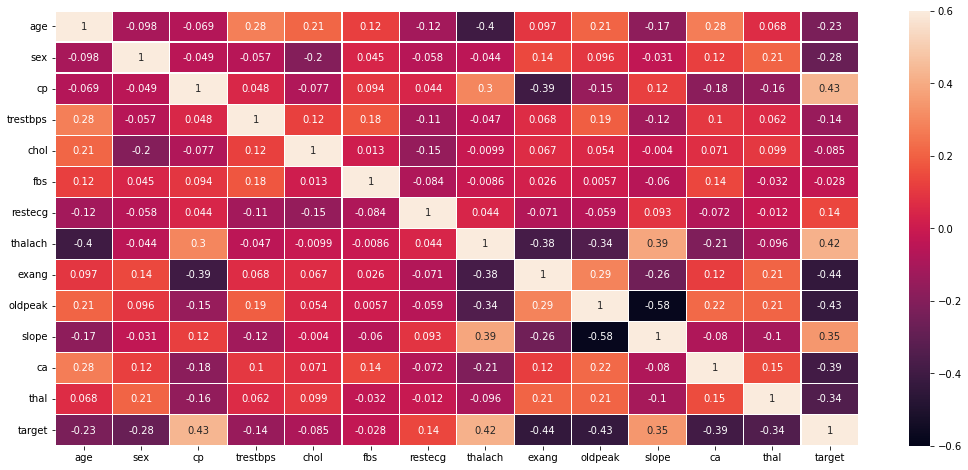

In [ ]:
corrmatrix =data.corr()
plt.subplots(figsize=(18,8))
sns.heatmap(corrmatrix,vmin=-.6,vmax=0.6,annot=True,linewidths=0.2)


In [ ]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
data1=data.drop(['oldpeak','slope','ca'],axis=1)
data1.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'thal', 'target'],
      dtype='object')

In [ ]:
y=data1['age']
x=data1.drop(['age'],axis=1)

In [ ]:
x.shape

(303, 10)

In [ ]:
from sklearn.model_selection import  train_test_split
x_train,x_test,y_tarin,y_test=train_test_split(x,y,random_state=42,test_size=0.25)


In [ ]:
from sklearn import linear_model
lr= linear_model.LinearRegression()


In [ ]:
 model= lr.fit(x_train,y_tarin)

In [ ]:
predictions =model.predict(x_test)

In [ ]:
print(y_test)

179    57
228    59
111    57
246    56
60     71
       ..
22     42
258    62
56     48
242    64
114    55
Name: age, Length: 76, dtype: int64


In [ ]:
print(predictions)

[62.80979752 60.89544531 50.31994888 61.47130627 59.05343585 49.03381918
 54.71263869 70.20134185 59.70233197 54.05626611 51.7318602  62.06539619
 50.2423424  55.61457895 46.53309479 50.21759949 45.04022327 57.37845166
 61.10432225 56.5911009  58.25576178 64.99936653 65.01824163 57.48708335
 53.09484571 51.30268988 64.18906172 48.4142587  67.07174195 51.77550677
 59.19876402 56.4839899  60.81088885 48.69333173 62.20669404 56.40533765
 52.83688859 50.24319194 47.75343118 46.75271193 50.05186938 49.64827349
 56.01386521 50.34020045 48.7703896  57.77613691 51.05513822 47.55924533
 61.6930415  60.13933598 56.6889753  58.29869337 54.26309364 51.70771106
 53.3440124  59.21513143 58.21004196 49.15539684 57.71524579 58.65095752
 61.4639599  50.9527825  63.83710723 56.68703167 54.50754056 51.46162325
 55.33830739 56.30341123 57.67499234 56.83272797 46.99481807 48.46595198
 55.97116888 46.29008513 58.27542501 52.26879136]


In [ ]:
from sklearn.metrics import mean_squared_error
print('MSE is:',mean_squared_error(y_test,predictions))

MSE is: 53.80251497504577
